### Read Data and Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

df = pd.read_csv('../data/AAPL.csv',index_col=0,parse_dates=[0])
print(df.shape)
print("")
print(df.head())
print("")
print(df.dtypes)

(10530, 6)

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
1980-12-15  0.122210  0.122210  0.121652  0.121652   0.094820  175884800
1980-12-16  0.113281  0.113281  0.112723  0.112723   0.087861  105728000
1980-12-17  0.115513  0.116071  0.115513  0.115513   0.090035   86441600
1980-12-18  0.118862  0.119420  0.118862  0.118862   0.092646   73449600
1980-12-19  0.126116  0.126674  0.126116  0.126116   0.098300   48630400

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


We have 10530 rows and 6 features in this dataset.

**Check missing values and Fill in time gaps**

In [2]:
df.isnull().values.sum()

0

In [3]:
# Fill in Date Gap with NaN
df = df.resample('1D').mean()
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094820,175884800.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087861,105728000.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090035,86441600.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092646,73449600.0
1980-12-19,0.126116,0.126674,0.126116,0.126116,0.098300,48630400.0
...,...,...,...,...,...,...
2022-09-15,154.649994,155.240005,151.380005,152.369995,152.369995,90481100.0
2022-09-16,151.210007,151.350006,148.369995,150.699997,150.699997,162157000.0
2022-09-17,NaN,NaN,NaN,NaN,NaN,NaN


After filling the date gaps, we have 15254 rows.

### Exploratory Data Analysis

**Take a look at the distribution of each feature**

In [4]:
# Feature 'Open'
df['Open'].describe()

count    10530.000000
mean        15.599898
std         33.624886
min          0.049665
25%          0.285714
50%          0.480045
75%         15.422232
max        182.630005
Name: Open, dtype: float64

In [5]:
# Feature 'High'
df['High'].describe()

count    10530.000000
mean        15.774165
std         34.022618
min          0.049665
25%          0.291295
50%          0.488839
75%         15.558303
max        182.940002
Name: High, dtype: float64

In [6]:
# Feature 'Low'
df['Low'].describe()

count    10530.000000
mean        15.427911
std         33.240282
min          0.049107
25%          0.277902
50%          0.471205
75%         15.274911
max        179.119995
Name: Low, dtype: float64

In [7]:
# Feature 'Adj Close'
df['Adj Close'].describe()

count    10530.000000
mean        14.958183
std         33.344906
min          0.038276
25%          0.236786
50%          0.396429
75%         13.365451
max        181.259918
Name: Adj Close, dtype: float64

In [8]:
# Feature 'Volume'
df['Volume'].describe()

count    1.053000e+04
mean     3.293018e+08
std      3.384208e+08
min      0.000000e+00
25%      1.226008e+08
50%      2.169244e+08
75%      4.084710e+08
max      7.421641e+09
Name: Volume, dtype: float64

In [9]:
# Target Variable 'Close'
df['Close'].describe()

count    10530.000000
mean        15.607666
std         33.647836
min          0.049107
25%          0.285224
50%          0.479911
75%         15.376875
max        182.009995
Name: Close, dtype: float64

**Histogram of the target variable (Close)**

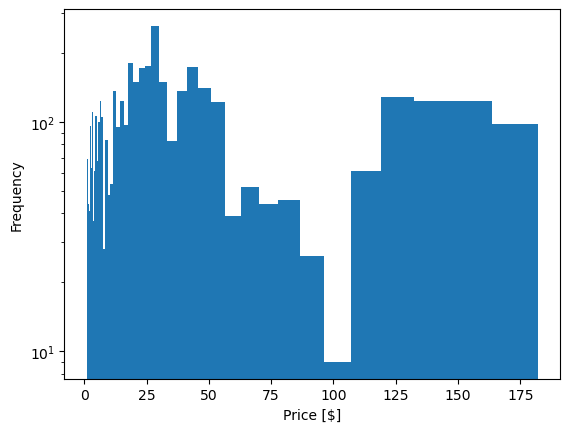

In [10]:
# Histogram of 'Close'
df['Close'].plot.hist(log = True, bins = np.logspace(np.log10(1),np.log10(np.max(df['Close']))))
plt.xlabel('Price [$]')
plt.ylabel('Frequency')
plt.savefig('../figures/close_freq.png',dpi=300)
plt.show()

**AAPL Stock Close Price Trend Over 40 Years**

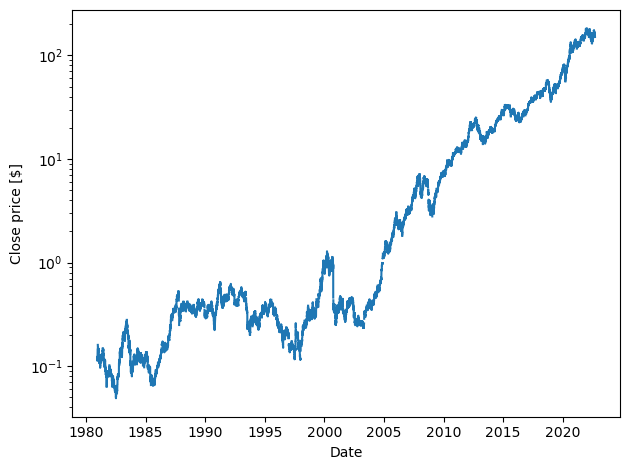

In [11]:
plt.plot(df['Close']) 
plt.xlabel('Date') #fontsize = 12
plt.ylabel('Close price [$]') #fontsize = 12
# plt.xticks(fontsize=12) # Slide purpose
# plt.yticks(fontsize=12) # Slide purpose
plt.semilogy() 
plt.tight_layout()
plt.savefig('../figures/close_trend_all.png',dpi=300)
plt.show()

**Scatter plots among features and the target variable**

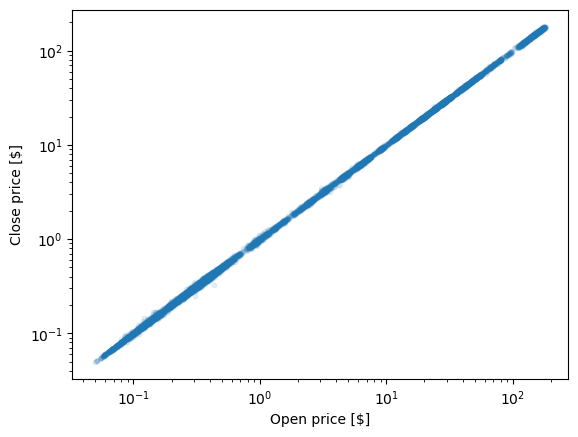

In [12]:
# Open and Close prices in a day are highly related
df.plot.scatter('Open','Close',s = 10,alpha = 0.1)
plt.semilogx() 
plt.semilogy() 
plt.xlabel('Open price [$]')
plt.ylabel('Close price [$]')
plt.savefig('../figures/close_open.png',dpi=300)
plt.show()

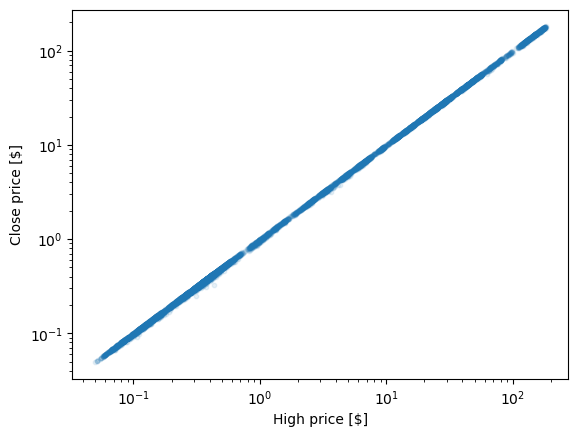

In [13]:
# High and Close prices in a day are highly related
df.plot.scatter('High','Close',s = 10, alpha = 0.1)
plt.semilogx() 
plt.semilogy()
plt.xlabel('High price [$]')
plt.ylabel('Close price [$]')
plt.savefig('../figures/close_high.png',dpi=300)
plt.show()

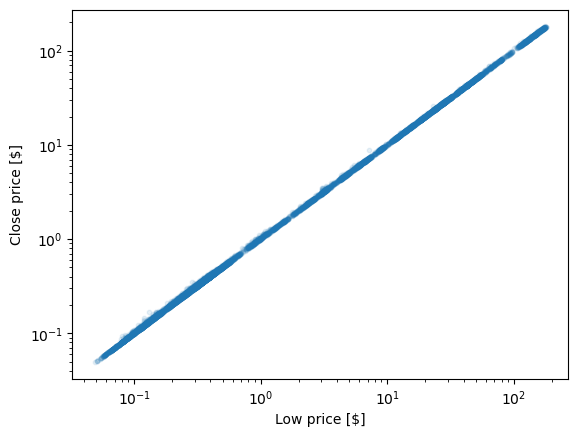

In [14]:
# Low and Close prices in a day are highly related
df.plot.scatter('Low','Close',s = 10, alpha = 0.1)
plt.semilogx() 
plt.semilogy()
plt.xlabel('Low price [$]')
plt.ylabel('Close price [$]')
plt.savefig('../figures/close_low.png',dpi=300)
plt.show()

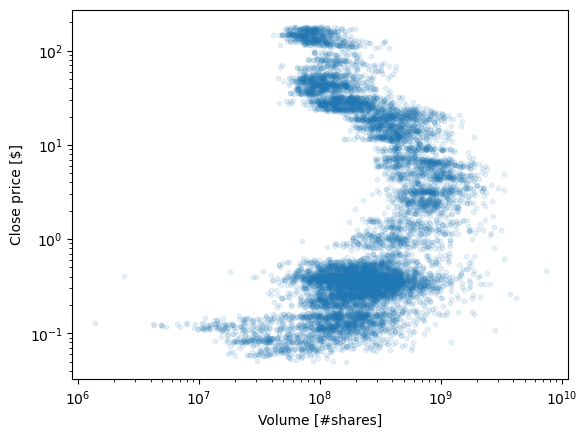

In [15]:
# scatter plot for volume and close
df.plot.scatter('Volume','Close', s = 10, alpha = 0.1)
plt.semilogx() 
plt.semilogy()
plt.xlabel('Volume [#shares]') #fontsize = 12
plt.ylabel('Close price [$]') #fontsize = 12
# plt.xticks(fontsize=12) # Slide purpose
# plt.yticks(fontsize=12) # Slide purpose
plt.savefig('../figures/close_vol.png',dpi=300)
plt.show()

People are most likely to sell stocks when the price is within the medium range.

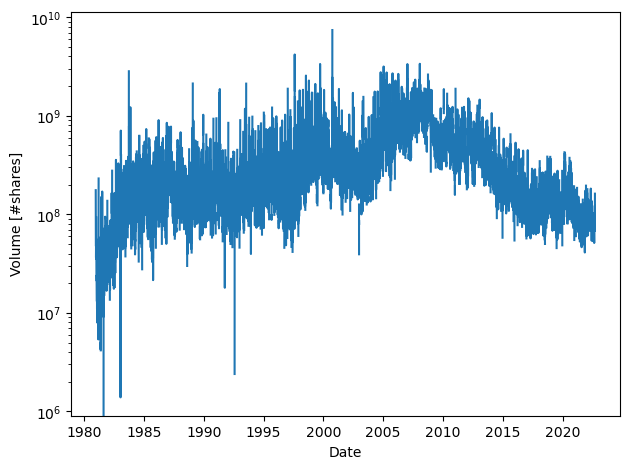

In [16]:
plt.plot(df['Volume']) 
plt.semilogy()
plt.xlabel('Date') #fontsize = 12
plt.ylabel('Volume [#shares]') #fontsize = 12
# plt.xticks(fontsize=12) # Slide purpose
# plt.yticks(fontsize=12) # Slide purpose
plt.tight_layout()
plt.savefig('../figures/vol_trend_all.png',dpi=300)
plt.show()

**On some days, volumes are extremely high. Let's take a look.**

**2000-09-29: Apple's Highest Volume in History**

In [17]:
print(df.loc[df[['Volume']].idxmax()])

                Open      High       Low     Close  Adj Close        Volume
Date                                                                       
2000-09-29  0.503348  0.517857  0.453125  0.459821    0.39261  7.421641e+09


**Let's see the price trend in that week**

In [18]:
print(df.loc['2000-09-25':'2000-09-29'])

                Open      High       Low     Close  Adj Close        Volume
Date                                                                       
2000-09-25  0.941964  0.991071  0.929688  0.955357   0.815714  4.355512e+08
2000-09-26  0.952009  0.977679  0.917411  0.918527   0.784268  2.909368e+08
2000-09-27  0.924107  0.941964  0.861607  0.873884   0.746150  4.022592e+08
2000-09-28  0.880580  0.960938  0.859375  0.955357   0.815714  9.795856e+08
2000-09-29  0.503348  0.517857  0.453125  0.459821   0.392610  7.421641e+09


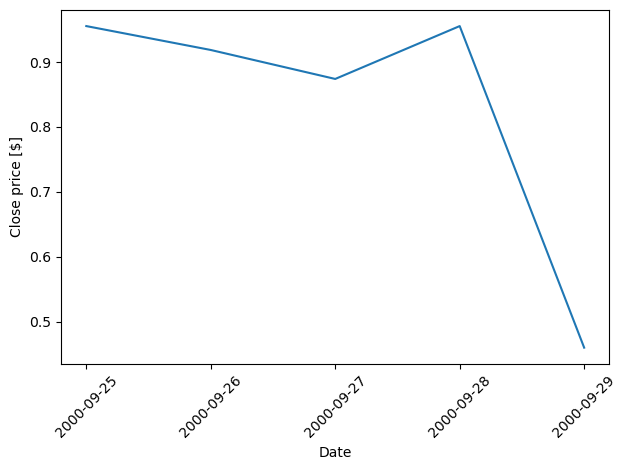

In [19]:
Last_week_Sep_2000 = df.loc['2000-09-25':'2000-09-29']

plt.plot(Last_week_Sep_2000['Close'])
plt.xlabel('Date') #fontsize = 12
plt.ylabel('Close price [$]') #fontsize = 12
plt.xticks(['2000-09-25', '2000-09-26', '2000-09-27', '2000-09-28','2000-09-29'], rotation=45)
# plt.yticks(fontsize=12) # Slide purpose
plt.tight_layout()
plt.savefig('../figures/price_plunge_2000.png',dpi=300)
plt.show()

**Apple's stock price sliced in half in that week, hence causing the volume to increase.**

**Volumes are exceptionally high during economic recession**
- 1997 Asian Financial Crisis
- Financial crisis of 2007–2008

In [20]:
print(df[df['Volume']>=3300000000])

                Open      High       Low     Close  Adj Close        Volume
Date                                                                       
1997-08-06  0.225446  0.247768  0.223214  0.234933   0.200593  4.190480e+09
1997-08-07  0.256696  0.263951  0.253348  0.260603   0.222511  3.755438e+09
1999-09-21  0.653460  0.654018  0.616071  0.618304   0.527928  3.357558e+09
2000-09-29  0.503348  0.517857  0.453125  0.459821   0.392610  7.421641e+09
2007-01-09  3.087500  3.320714  3.041071  3.306071   2.822829  3.349298e+09
2008-01-23  4.863929  5.000000  4.505000  4.966786   4.240800  3.372970e+09


**Autocorrelation Plot in lag days**

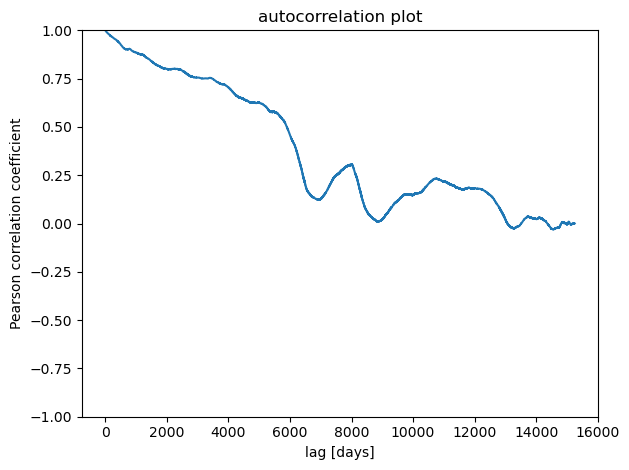

In [22]:
lags = np.arange(df.shape[0])
corr_coefs = np.zeros(df.shape[0])

for i in np.arange(len(lags)):
    x = df['Close'].iloc[i:-1].reset_index(drop=True) # recent observations
    y = df['Close'].iloc[:-i-1].reset_index(drop=True) # lag-shifted observations
    # the shapes must be the same
    if x.shape != y.shape:
        raise ValueError('shape mismatch!')
    # Pearson correlation multiplied by the fraction of time series used
    corr_coefs[i] = x.corr(y,method='pearson')*x.shape[0]/df['Close'].shape[0]
# print(corr_coefs[:10])

plt.plot(lags[2:],corr_coefs[2:])
plt.ylim([-1,1])
plt.xlabel('lag [days]') # fontsize=12
plt.ylabel('Pearson correlation coefficient') # fontsize=12
# plt.xticks(fontsize=12) # Slide purpose
# plt.yticks(fontsize=12) # Slide purpose
plt.title('autocorrelation plot')
plt.tight_layout()
plt.savefig('../figures/autocor_days.png',dpi=300)
plt.show()

**Autocorrelation plot in year**

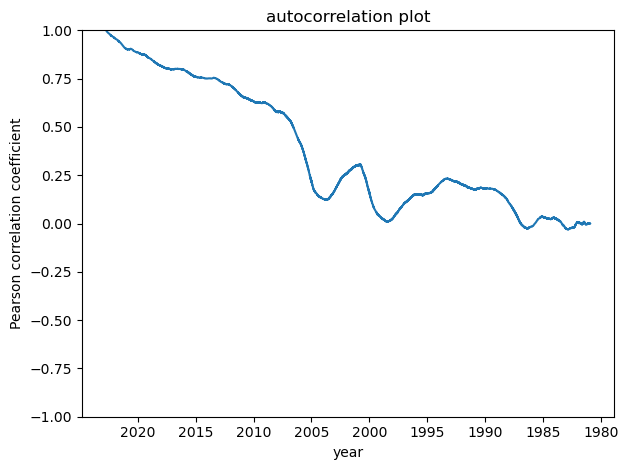

In [23]:
lags = np.arange(df.shape[0])
years = df.index

corr_coefs = np.zeros(df.shape[0])

for i in np.arange(len(lags)):
    x = df['Close'].iloc[i:-1].reset_index(drop=True) # recent observations
    y = df['Close'].iloc[:-i-1].reset_index(drop=True) # lag-shifted observations
    # the shapes must be the same
    if x.shape != y.shape:
        raise ValueError('shape mismatch!')
    # Pearson correlation multiplied by the fraction of time series used
    corr_coefs[i] = x.corr(y,method='pearson')*x.shape[0]/df['Close'].shape[0]
# print(corr_coefs[:10])


plt.plot(years[2:],corr_coefs[len(corr_coefs):1:-1])
plt.gca().invert_xaxis()
plt.ylim([-1,1])
plt.xlabel('year') # fontsize=12
plt.ylabel('Pearson correlation coefficient') # fontsize=12
plt.title('autocorrelation plot')
# plt.xticks(fontsize=12) # Slide purpose
# plt.yticks(fontsize=12) # Slide purpose
plt.tight_layout()
plt.savefig('../figures/autocor_year.png',dpi=300)
plt.show()

### Create a feature matrix for each feature with lag_days = 10

**Open**

In [24]:
# Get the opening price of previous days to make a feature matrix
lag_days = 10

column_names = []
for i in range(lag_days,1,-1):
    column_names.append(str(i).join(['lag_','_days']))

column_names.append(str(1).join(['lag_','_day']))

df_lag_open = pd.concat([df['Open'].shift(lag_days-i) for i in range(lag_days)],axis=1)
df_lag_open.columns = column_names

print(df_lag_open.tail(10))
print("")
print(df_lag_open.shape)

            lag_10_days  lag_9_days  lag_8_days  lag_7_days  lag_6_days  \
Date                                                                      
2022-09-10   160.309998  156.639999  159.750000         NaN         NaN   
2022-09-11   156.639999  159.750000         NaN         NaN         NaN   
2022-09-12   159.750000         NaN         NaN         NaN  156.470001   
2022-09-13          NaN         NaN         NaN  156.470001  154.820007   
2022-09-14          NaN         NaN  156.470001  154.820007  154.639999   
2022-09-15          NaN  156.470001  154.820007  154.639999  155.470001   
2022-09-16   156.470001  154.820007  154.639999  155.470001         NaN   
2022-09-17   154.820007  154.639999  155.470001         NaN         NaN   
2022-09-18   154.639999  155.470001         NaN         NaN  159.589996   
2022-09-19   155.470001         NaN         NaN  159.589996  159.899994   

            lag_5_days  lag_4_days  lag_3_days  lag_2_days   lag_1_day  
Date                      

**High**

In [25]:
# Get the high price of previous days to make a feature matrix
df_lag_high = pd.concat([df['High'].shift(lag_days-i) for i in range(lag_days)],axis=1)
df_lag_high.columns = column_names

print(df_lag_high.tail(10))
print("")
print(df_lag_high.shape)

            lag_10_days  lag_9_days  lag_8_days  lag_7_days  lag_6_days  \
Date                                                                      
2022-09-10   160.580002  158.419998  160.360001         NaN         NaN   
2022-09-11   158.419998  160.360001         NaN         NaN         NaN   
2022-09-12   160.360001         NaN         NaN         NaN  157.089996   
2022-09-13          NaN         NaN         NaN  157.089996  156.669998   
2022-09-14          NaN         NaN  157.089996  156.669998  156.360001   
2022-09-15          NaN  157.089996  156.669998  156.360001  157.820007   
2022-09-16   157.089996  156.669998  156.360001  157.820007         NaN   
2022-09-17   156.669998  156.360001  157.820007         NaN         NaN   
2022-09-18   156.360001  157.820007         NaN         NaN  164.259995   
2022-09-19   157.820007         NaN         NaN  164.259995  160.539993   

            lag_5_days  lag_4_days  lag_3_days  lag_2_days   lag_1_day  
Date                      

**Low**

In [26]:
# Get the low price of previous days to make a feature matrix
df_lag_low = pd.concat([df['Low'].shift(lag_days-i) for i in range(lag_days)],axis=1)
df_lag_low.columns = column_names

print(df_lag_low.tail(10))
print("")
print(df_lag_low.shape)

            lag_10_days  lag_9_days  lag_8_days  lag_7_days  lag_6_days  \
Date                                                                      
2022-09-10   157.139999  154.669998  154.970001         NaN         NaN   
2022-09-11   154.669998  154.970001         NaN         NaN         NaN   
2022-09-12   154.970001         NaN         NaN         NaN  153.690002   
2022-09-13          NaN         NaN         NaN  153.690002  153.610001   
2022-09-14          NaN         NaN  153.690002  153.610001  152.679993   
2022-09-15          NaN  153.690002  153.610001  152.679993  154.750000   
2022-09-16   153.690002  153.610001  152.679993  154.750000         NaN   
2022-09-17   153.610001  152.679993  154.750000         NaN         NaN   
2022-09-18   152.679993  154.750000         NaN         NaN  159.300003   
2022-09-19   154.750000         NaN         NaN  159.300003  153.369995   

            lag_5_days  lag_4_days  lag_3_days  lag_2_days   lag_1_day  
Date                      

**Adj Close**

In [27]:
# Get the adj_close price of previous days to make a feature matrix
df_lag_adj = pd.concat([df['Adj Close'].shift(lag_days-i) for i in range(lag_days)],axis=1)
df_lag_adj.columns = column_names

print(df_lag_adj.tail(10))
print("")
print(df_lag_adj.shape)

            lag_10_days  lag_9_days  lag_8_days  lag_7_days  lag_6_days  \
Date                                                                      
2022-09-10   157.220001  157.960007  155.809998         NaN         NaN   
2022-09-11   157.960007  155.809998         NaN         NaN         NaN   
2022-09-12   155.809998         NaN         NaN         NaN  154.529999   
2022-09-13          NaN         NaN         NaN  154.529999  155.960007   
2022-09-14          NaN         NaN  154.529999  155.960007  154.460007   
2022-09-15          NaN  154.529999  155.960007  154.460007  157.369995   
2022-09-16   154.529999  155.960007  154.460007  157.369995         NaN   
2022-09-17   155.960007  154.460007  157.369995         NaN         NaN   
2022-09-18   154.460007  157.369995         NaN         NaN  163.429993   
2022-09-19   157.369995         NaN         NaN  163.429993  153.839996   

            lag_5_days  lag_4_days  lag_3_days  lag_2_days   lag_1_day  
Date                      

**Close**

In [28]:
# Get the closing price of previous days to make a feature matrix
df_lag_close = pd.concat([df['Close'].shift(lag_days-i) for i in range(lag_days)],axis=1)
df_lag_close.columns = column_names

print(df_lag_close.tail(10))
print("")
print(df_lag_close.shape)

            lag_10_days  lag_9_days  lag_8_days  lag_7_days  lag_6_days  \
Date                                                                      
2022-09-10   157.220001  157.960007  155.809998         NaN         NaN   
2022-09-11   157.960007  155.809998         NaN         NaN         NaN   
2022-09-12   155.809998         NaN         NaN         NaN  154.529999   
2022-09-13          NaN         NaN         NaN  154.529999  155.960007   
2022-09-14          NaN         NaN  154.529999  155.960007  154.460007   
2022-09-15          NaN  154.529999  155.960007  154.460007  157.369995   
2022-09-16   154.529999  155.960007  154.460007  157.369995         NaN   
2022-09-17   155.960007  154.460007  157.369995         NaN         NaN   
2022-09-18   154.460007  157.369995         NaN         NaN  163.429993   
2022-09-19   157.369995         NaN         NaN  163.429993  153.839996   

            lag_5_days  lag_4_days  lag_3_days  lag_2_days   lag_1_day  
Date                      

**Volume**

In [29]:
# Get the volume of previous days to make a feature matrix
df_lag_vol = pd.concat([df['Volume'].shift(lag_days-i) for i in range(lag_days)],axis=1)
df_lag_vol.columns = column_names

print(df_lag_vol.tail(10))
print("")
print(df_lag_vol.shape)

            lag_10_days  lag_9_days  lag_8_days   lag_7_days   lag_6_days  \
Date                                                                        
2022-09-10   87991100.0  74229900.0  76905200.0          NaN          NaN   
2022-09-11   74229900.0  76905200.0         NaN          NaN          NaN   
2022-09-12   76905200.0         NaN         NaN          NaN   73714800.0   
2022-09-13          NaN         NaN         NaN   73714800.0   87449600.0   
2022-09-14          NaN         NaN  73714800.0   87449600.0   84923800.0   
2022-09-15          NaN  73714800.0  87449600.0   84923800.0   68028800.0   
2022-09-16   73714800.0  87449600.0  84923800.0   68028800.0          NaN   
2022-09-17   87449600.0  84923800.0  68028800.0          NaN          NaN   
2022-09-18   84923800.0  68028800.0         NaN          NaN  104956000.0   
2022-09-19   68028800.0         NaN         NaN  104956000.0  122656600.0   

             lag_5_days   lag_4_days   lag_3_days   lag_2_days    lag_1_day

**Merge the dataframes to complete the feature matrix**

In [30]:
feat_mat = df_lag_vol.merge(df["Close"],how='right',on='Date')
feat_mat = df_lag_adj.merge(feat_mat,how='right',on='Date',suffixes=('_adj','_vol'))

feat_mat = df_lag_close.merge(feat_mat,how='right',on='Date')
feat_mat = df_lag_low.merge(feat_mat,how='right',on='Date',suffixes=('_low','_close'))

feat_mat = df_lag_high.merge(feat_mat,how='right',on='Date')
feat_mat = df_lag_open.merge(feat_mat,how='right',on='Date',suffixes=('_open','_high'))

print(feat_mat.columns)
print(feat_mat)

Index(['lag_10_days_open', 'lag_9_days_open', 'lag_8_days_open',
       'lag_7_days_open', 'lag_6_days_open', 'lag_5_days_open',
       'lag_4_days_open', 'lag_3_days_open', 'lag_2_days_open',
       'lag_1_day_open', 'lag_10_days_high', 'lag_9_days_high',
       'lag_8_days_high', 'lag_7_days_high', 'lag_6_days_high',
       'lag_5_days_high', 'lag_4_days_high', 'lag_3_days_high',
       'lag_2_days_high', 'lag_1_day_high', 'lag_10_days_low',
       'lag_9_days_low', 'lag_8_days_low', 'lag_7_days_low', 'lag_6_days_low',
       'lag_5_days_low', 'lag_4_days_low', 'lag_3_days_low', 'lag_2_days_low',
       'lag_1_day_low', 'lag_10_days_close', 'lag_9_days_close',
       'lag_8_days_close', 'lag_7_days_close', 'lag_6_days_close',
       'lag_5_days_close', 'lag_4_days_close', 'lag_3_days_close',
       'lag_2_days_close', 'lag_1_day_close', 'lag_10_days_adj',
       'lag_9_days_adj', 'lag_8_days_adj', 'lag_7_days_adj', 'lag_6_days_adj',
       'lag_5_days_adj', 'lag_4_days_adj', 'lag_3_d

### Splitting data

**Split the dataset with a train-val-test ratio of 60%-20%-20%**

In [31]:
from sklearn.model_selection import train_test_split 

# drop rows where target variables are NaNs 
feat_mat_with_nan = feat_mat[feat_mat['Close'].notna()]

X = feat_mat_with_nan.drop(columns = ['Close'])
y = feat_mat_with_nan['Close']

# print(X)
# print(y)

# first split to separate out the training set
X_train, X_other, y_train, y_other = train_test_split(X,y, train_size = 0.6, shuffle = False)
print('training set:',X_train.shape, y_train.shape) # 60% of points are in train
# print(X_other.shape, y_other.shape) # 40% of points are in other

# second split to separate out the validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5, shuffle = False)
print('validation set:',X_val.shape, y_val.shape) # 20% of points are in validation
print('test set:',X_test.shape, y_test.shape) # 20% of points are in test

print(X_train.tail())
print(y_train.tail())

# print(X_val.head())
# print(y_val.head())

# print(X_test.head())
# print(y_test.head())

training set: (6318, 60) (6318,)
validation set: (2106, 60) (2106,)
test set: (2106, 60) (2106,)
            lag_10_days_open  lag_9_days_open  lag_8_days_open  \
Date                                                             
2005-12-16          2.640357         2.651071         2.614286   
2005-12-19          2.650357              NaN              NaN   
2005-12-20               NaN              NaN         2.673929   
2005-12-21               NaN         2.673929         2.673214   
2005-12-22          2.673929         2.673214         2.590357   

            lag_7_days_open  lag_6_days_open  lag_5_days_open  \
Date                                                            
2005-12-16         2.650357              NaN              NaN   
2005-12-19         2.673929         2.673214         2.590357   
2005-12-20         2.673214         2.590357         2.595714   
2005-12-21         2.590357         2.595714         2.576429   
2005-12-22         2.595714         2.576429      

### Preprocessing

**Preprocess all features with standard scaler**

In [32]:
num_ftrs = feat_mat.columns[:-1]

# preprocess with pipeline and columntransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# standard scaler
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# collect the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_ftrs)])

In [33]:
# fit_transform the training set
X_prep = preprocessor.fit_transform(X_train)

# little hacky, but collect feature names
feature_names = preprocessor.get_feature_names_out()

df_train = pd.DataFrame(data=X_prep,columns=feature_names,index=X_train.index)
print(df_train.shape)

# transform the val
df_val = preprocessor.transform(X_val)
df_val = pd.DataFrame(data=df_val,columns = feature_names,index=X_val.index)
print(df_val.shape)

# transform the test
df_test = preprocessor.transform(X_test)
df_test = pd.DataFrame(data=df_test,columns = feature_names,index=X_test.index)
print(df_test.shape)

(6318, 60)
(2106, 60)
(2106, 60)


In [34]:
df_train.head(10)

,num__lag_10_days_open,num__lag_9_days_open,num__lag_8_days_open,num__lag_7_days_open,num__lag_6_days_open,num__lag_5_days_open,num__lag_4_days_open,num__lag_3_days_open,num__lag_2_days_open,num__lag_1_day_open,...,num__lag_10_days_vol,num__lag_9_days_vol,num__lag_8_days_vol,num__lag_7_days_vol,num__lag_6_days_vol,num__lag_5_days_vol,num__lag_4_days_vol,num__lag_3_days_vol,num__lag_2_days_vol,num__lag_1_day_vol
Date,,,,,,,,,,,,,,,,,,,,,
1980-12-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.766075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.372953
1980-12-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.765170,-0.793049,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.370617,-0.627181
1980-12-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.763505,-0.792159,-0.786306,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.324511,-0.638484,-0.697069
1980-12-19,NaN,NaN,NaN,NaN,NaN,NaN,-0.766211,-0.790522,-0.785413,-0.776189,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.320067,-0.579402,-0.712122,-0.744149
1980-12-22,NaN,NaN,NaN,-0.770722,-0.797743,-0.789093,-0.776390,-0.751686,NaN,NaN,...,NaN,NaN,NaN,-0.347064,-0.596104,-0.637756,-0.667726,-0.786847,NaN,NaN
1980-12-23,NaN,NaN,-0.773891,-0.798059,-0.790943,-0.778919,-0.754336,NaN,NaN,-0.735733,...,NaN,NaN,-0.369065,-0.591055,-0.661280,-0.679630,-0.751961,NaN,NaN,-0.874916
1980-12-24,NaN,-0.772889,-0.801316,-0.791225,-0.780739,-0.756881,NaN,NaN,-0.734812,-0.718873,...,NaN,-0.369282,-0.622983,-0.658129,-0.705185,-0.759624,NaN,NaN,-0.899509,-0.840174
1980-12-26,-0.798829,-0.793466,-0.784174,-0.758764,NaN,NaN,-0.735675,-0.716227,-0.696017,NaN,...,-0.570484,-0.711135,-0.739808,-0.789629,NaN,NaN,-0.790201,-0.792950,-0.858884,NaN


In [35]:
y_train.head(10)

Date
1980-12-15    0.121652
1980-12-16    0.112723
1980-12-17    0.115513
1980-12-18    0.118862
1980-12-19    0.126116
1980-12-22    0.132254
1980-12-23    0.137835
1980-12-24    0.145089
1980-12-26    0.158482
1980-12-29    0.160714
Name: Close, dtype: float64

### Models without imputation or interpolation

**XGBoost**

In [37]:
# train the XGBoost model
import xgboost
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

param_grid = {"learning_rate": [0.03],
              "n_estimators": [10000],
              "seed": [124],
              "reg_alpha": [0e0, 1e-2, 1e-1, 1e0, 1e1, 1e2],
              "reg_lambda": [0e0, 1e-2, 1e-1, 1e0, 1e1, 1e2],
              "missing": [np.nan], 
              "max_depth": [1,3,10,30,100],
              "colsample_bytree": [0.9], # ratio of features used             
              "subsample": [0.66]} # ratio of samples used

# save the validation scores
# the validation scores are necessary to select the best model
val_score_XGB = np.zeros(len(ParameterGrid(param_grid)))
models_XGB=[]
final_models_XGB=[]

# loop through all combinations of hyperparameter combos
for p in range(len(ParameterGrid(param_grid))):
    XGB = xgboost.XGBRegressor()
    XGB.set_params(**ParameterGrid(param_grid)[p]) 
    XGB.fit(df_train,y_train,early_stopping_rounds=50,eval_set=[(df_val, y_val)], verbose=False,eval_metric='error')
    models_XGB.append(XGB) # save it

    # calculate validation scores
    y_val_pred = XGB.predict(df_val)
    val_score_XGB[p] = np.sqrt(mean_squared_error(y_val,y_val_pred))
    # print('the val RMSE:',np.sqrt(mean_squared_error(y_val,y_val_pred)))

# print out model parameters that minimize validation RMSE
print('best model parameters:',ParameterGrid(param_grid)[np.argmin(val_score_XGB)])
print('corresponding validation RMSE:',np.min(val_score_XGB))

# collect and save the best model
final_models_XGB.append(models_XGB[np.argmin(val_score_XGB)])

# calculate the test score
y_test_pred = final_models_XGB[-1].predict(df_test)
print('the test RMSE:',np.sqrt(mean_squared_error(y_test,y_test_pred)))
print('the test R2:',r2_score(y_test,y_test_pred))

best model parameters: {'subsample': 0.66, 'seed': 124, 'reg_lambda': 0.1, 'reg_alpha': 1.0, 'n_estimators': 10000, 'missing': nan, 'max_depth': 3, 'learning_rate': 0.03, 'colsample_bytree': 0.9}
corresponding validation RMSE: 10.709386212339783
the test RMSE: 80.87830616092042
the test R2: -1.8924097162535074


### Models with interpolation

In [38]:
df_int = df.interpolate(method='linear', limit_direction='forward', axis=0)

# Get the opening price of previous days to make a feature matrix
lag_days = 10

column_names = []
for i in range(lag_days,1,-1):
    column_names.append(str(i).join(['lag_','_days']))

column_names.append(str(1).join(['lag_','_day']))

# Get the open price of previous days to make a feature matrix
df_lag_open_int = pd.concat([df_int['Open'].shift(lag_days-i) for i in range(lag_days)],axis=1)
df_lag_open_int.columns = column_names

# Get the high price of previous days to make a feature matrix
df_lag_high_int = pd.concat([df_int['High'].shift(lag_days-i) for i in range(lag_days)],axis=1)
df_lag_high_int.columns = column_names

# Get the low price of previous days to make a feature matrix
df_lag_low_int = pd.concat([df_int['Low'].shift(lag_days-i) for i in range(lag_days)],axis=1)
df_lag_low_int.columns = column_names

# Get the adj_close price of previous days to make a feature matrix
df_lag_adj_int = pd.concat([df_int['Adj Close'].shift(lag_days-i) for i in range(lag_days)],axis=1)
df_lag_adj_int.columns = column_names

# Get the closing price of previous days to make a feature matrix
df_lag_close_int = pd.concat([df_int['Close'].shift(lag_days-i) for i in range(lag_days)],axis=1)
df_lag_close_int.columns = column_names

# Get the volume of previous days to make a feature matrix
df_lag_vol_int = pd.concat([df_int['Volume'].shift(lag_days-i) for i in range(lag_days)],axis=1)
df_lag_vol_int.columns = column_names

feat_mat_int = df_lag_vol_int.merge(df_int["Close"],how='right',on='Date')
feat_mat_int = df_lag_adj_int.merge(feat_mat_int,how='right',on='Date',suffixes=('_adj','_vol'))

feat_mat_int = df_lag_close_int.merge(feat_mat_int,how='right',on='Date')
feat_mat_int = df_lag_low_int.merge(feat_mat_int,how='right',on='Date',suffixes=('_low','_close'))

feat_mat_int = df_lag_high_int.merge(feat_mat_int,how='right',on='Date')
feat_mat_int = df_lag_open_int.merge(feat_mat_int,how='right',on='Date',suffixes=('_open','_high'))

# print(feat_mat_int.columns)
# print(feat_mat_int)

# only first 10 rows will be removed
feat_mat_int = feat_mat_int.dropna()

In [39]:
from sklearn.model_selection import train_test_split 

X = feat_mat_int.drop(columns = ['Close'])
y = feat_mat_int['Close']

# print(X)
# print(y)

# first split to separate out the training set
X_train, X_other, y_train, y_other = train_test_split(X,y, train_size = 0.6, shuffle = False)
print('training set:',X_train.shape, y_train.shape) # 60% of points are in train
# print(X_other.shape, y_other.shape) # 40% of points are in other

# second split to separate out the validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5, shuffle = False)
print('validation set:',X_val.shape, y_val.shape) # 20% of points are in validation
print('test set:',X_test.shape, y_test.shape) # 20% of points are in test

# print(X_train.tail())
# print(y_train.tail())

# print(X_val.head())
# print(y_val.head())

# print(X_test.head())
# print(y_test.head())

training set: (9146, 60) (9146,)
validation set: (3049, 60) (3049,)
test set: (3049, 60) (3049,)


In [40]:
# fit_transform the training set
X_prep = preprocessor.fit_transform(X_train)

# little hacky, but collect feature names
feature_names = preprocessor.get_feature_names_out()

df_train = pd.DataFrame(data=X_prep,columns=feature_names,index=X_train.index)
print(df_train.shape)

# transform the val
df_val = preprocessor.transform(X_val)
df_val = pd.DataFrame(data=df_val,columns = feature_names,index=X_val.index)
print(df_val.shape)

# transform the test
df_test = preprocessor.transform(X_test)
df_test = pd.DataFrame(data=df_test,columns = feature_names,index=X_test.index)
print(df_test.shape)

(9146, 60)
(3049, 60)
(3049, 60)


**Linear Regression with L1 Regularization**

In [41]:
from sklearn.linear_model import Lasso

param_grid = {
              'alpha': np.logspace(-7,0,19),
              'max_iter': [100000000] 
              } 

# save the validation scores
# the validation scores are necessary to select the best model
val_rmse_lasso = np.zeros(len(ParameterGrid(param_grid)))
val_r2_lasso = np.zeros(len(ParameterGrid(param_grid)))
models_lasso=[]
final_models_lasso=[]

# loop through all combinations of hyperparameter combos
for p in range(len(ParameterGrid(param_grid))):
    lasso = Lasso(random_state=124)
    lasso.set_params(**ParameterGrid(param_grid)[p]) 
    lasso.fit(df_train,y_train)
    models_lasso.append(lasso) # save it

    # calculate validation scores
    y_val_pred = lasso.predict(df_val)
    val_rmse_lasso[p] = np.sqrt(mean_squared_error(y_val,y_val_pred))
    val_r2_lasso[p] = r2_score(y_val,y_val_pred)
    # print('the val RMSE:',np.sqrt(mean_squared_error(y_val,y_val_pred)))

# print out model parameters that minimize validation RMSE
print('best model parameters (RMSE):',ParameterGrid(param_grid)[np.argmin(val_rmse_lasso)])
print('corresponding validation RMSE:',np.min(val_rmse_lasso))
# print('corresponding validation R2:',val_r2_lasso[np.argmin(val_rmse_lasso)])

# collect and save the best model
final_models_lasso.append(models_lasso[np.argmin(val_rmse_lasso)])

# calculate the test score
y_test_pred_lasso = final_models_lasso[-1].predict(df_test)
print('the test RMSE:',np.sqrt(mean_squared_error(y_test,y_test_pred_lasso)))
print('the test R2:',r2_score(y_test,y_test_pred_lasso))

best model parameters (RMSE): {'max_iter': 100000000, 'alpha': 0.000774263682681127}
corresponding validation RMSE: 0.16646164529598004
the test RMSE: 1.2556816993236586
the test R2: 0.9993025749610941


**Support Vector Regressor**

In [42]:
from sklearn.svm import SVR

# define parameter grid
param_grid = {
              'gamma': [1e-3, 1e-1, 1e1, 1e3],
              'C': [1e-1, 1e0, 1e1]
              } 

# save the validation scores
# the validation scores are necessary to select the best model
val_rmse_svr = np.zeros(len(ParameterGrid(param_grid)))
val_r2_svr = np.zeros(len(ParameterGrid(param_grid)))
models_svr=[]
final_models_svr=[]

# loop through all combinations of hyperparameter combos
for p in range(len(ParameterGrid(param_grid))):
    svr = SVR()
    svr.set_params(**ParameterGrid(param_grid)[p]) 
    svr.fit(df_train,y_train)
    models_svr.append(svr) # save it

    # calculate validation scores
    y_val_pred = svr.predict(df_val)
    val_rmse_svr[p] = np.sqrt(mean_squared_error(y_val,y_val_pred))
    val_r2_svr[p] = r2_score(y_val,y_val_pred)
    # print('the val RMSE:',np.sqrt(mean_squared_error(y_val,y_val_pred)))

# print out model parameters that minimize validation RMSE
print('best model parameters (RMSE):',ParameterGrid(param_grid)[np.argmin(val_rmse_svr)])
print('corresponding validation RMSE:',np.min(val_rmse_svr))
# print('corresponding validation R2:',val_r2_svr[np.argmin(val_rmse_svr)])

# collect and save the best model
final_models_svr.append(models_svr[np.argmin(val_rmse_svr)])

# calculate the test score
y_test_pred_svr = final_models_svr[-1].predict(df_test)
print('the test RMSE:',np.sqrt(mean_squared_error(y_test,y_test_pred_svr)))
print('the test R2:',r2_score(y_test,y_test_pred_svr))

best model parameters (RMSE): {'gamma': 0.001, 'C': 0.1}
corresponding validation RMSE: 11.168347680713534
the test RMSE: 81.39448771603264
the test R2: -1.9304100430917357


**Random Forest Regressor**

In [43]:
from sklearn.ensemble import RandomForestRegressor

# we will loop through nr_states random states so we will return nr_states test scores and nr_states trained models
nr_states = 5
test_scores = np.zeros(nr_states)
final_models_rf = []

# loop through the different random states
for i in range(nr_states):
    print('randoms state '+str(i+1))

    # define parameter grid
    param_grid = {                                 # the max_depth should be smaller or equal than the number of features roughly
                  'max_depth': [1, 3, 10, 30, 100], # no upper bound so the values are evenly spaced in log
                  'max_features': [0.25, 0.5, 0.75, 1.0],# linearly spaced because it is between 0 and 1, 0 is omitted
                  } 

    # save the validation scores
    # the validation scores are necessary to select the best model
    val_rmse_rf = np.zeros(len(ParameterGrid(param_grid)))
    val_r2_rf = np.zeros(len(ParameterGrid(param_grid)))
    models_rf = []
    
    # loop through all combinations of hyperparameter combos
    for p in range(len(ParameterGrid(param_grid))):
        rf = RandomForestRegressor(random_state = 124*i,n_jobs=-1)
        rf.set_params(**ParameterGrid(param_grid)[p]) 
        rf.fit(df_train,y_train)
        models_rf.append(rf) # save it

        # calculate validation scores
        y_val_pred = rf.predict(df_val)
        val_rmse_rf[p] = np.sqrt(mean_squared_error(y_val,y_val_pred))
        val_r2_rf[p] = r2_score(y_val,y_val_pred)
        # print('the val RMSE:',np.sqrt(mean_squared_error(y_val,y_val_pred)))

    # print out model parameters that minimize validation RMSE
    print('best model parameters (RMSE):',ParameterGrid(param_grid)[np.argmin(val_rmse_rf)])
    print('corresponding validation RMSE:',np.min(val_rmse_rf))
    # print('corresponding validation R2:',val_r2_rf[np.argmin(val_rmse_rf)])

    # collect and save the best model
    final_models_rf.append(models_rf[np.argmin(val_rmse_rf)])

    # calculate the test score
    y_test_pred_rf = final_models_rf[-1].predict(df_test)
    test_scores[i] = np.sqrt(mean_squared_error(y_test,y_test_pred_rf))
    print('the test RMSE:',np.sqrt(mean_squared_error(y_test,y_test_pred_rf)))
    print('the test R2:',r2_score(y_test,y_test_pred_rf))
    
print('the mean test RMSE:',np.mean(test_scores))

randoms state 1
best model parameters (RMSE): {'max_features': 1.0, 'max_depth': 30}
corresponding validation RMSE: 9.836660106041688
the test RMSE: 79.98507216028345
the test R2: -1.8298035541138549
randoms state 2
best model parameters (RMSE): {'max_features': 0.75, 'max_depth': 10}
corresponding validation RMSE: 9.82067934334188
the test RMSE: 79.96406502631275
the test R2: -1.8283173203863905
randoms state 3
best model parameters (RMSE): {'max_features': 0.75, 'max_depth': 100}
corresponding validation RMSE: 9.838294041505407
the test RMSE: 79.98599513289456
the test R2: -1.8298688624563773
randoms state 4
best model parameters (RMSE): {'max_features': 0.5, 'max_depth': 30}
corresponding validation RMSE: 9.839174644602032
the test RMSE: 79.98924572322164
the test R2: -1.830098876004426
randoms state 5
best model parameters (RMSE): {'max_features': 0.75, 'max_depth': 100}
corresponding validation RMSE: 9.837575708846906
the test RMSE: 79.98533499552873
the test R2: -1.8298221519175


**XGBoost**

In [44]:
# train the XGBoost model
param_grid = {"learning_rate": [0.03],
              "n_estimators": [10000],
              "seed": [124],
              "reg_alpha": [0e0, 1e-2, 1e-1, 1e0, 1e1, 1e2],
              "reg_lambda": [0e0, 1e-2, 1e-1, 1e0, 1e1, 1e2],
              "missing": [np.nan], 
              "max_depth": [1,3,10,30,100],
              "colsample_bytree": [0.9], # ratio of features used             
              "subsample": [0.66]} # ratio of samples used

# save the validation scores
# the validation scores are necessary to select the best model
val_rmse_XGB = np.zeros(len(ParameterGrid(param_grid)))
val_r2_XGB = np.zeros(len(ParameterGrid(param_grid)))
models_XGB=[]
final_models_XGB=[]

# loop through all combinations of hyperparameter combos
for p in range(len(ParameterGrid(param_grid))):
    XGB = xgboost.XGBRegressor()
    XGB.set_params(**ParameterGrid(param_grid)[p]) 
    XGB.fit(df_train,y_train,early_stopping_rounds=50,eval_set=[(df_val, y_val)], verbose=False,eval_metric='error')
    models_XGB.append(XGB) # save it

    # calculate validation scores
    y_val_pred = XGB.predict(df_val)
    val_rmse_XGB[p] = np.sqrt(mean_squared_error(y_val,y_val_pred))
    val_r2_XGB[p] = r2_score(y_val,y_val_pred)
    # print('the val RMSE:',np.sqrt(mean_squared_error(y_val,y_val_pred)))

# print out model parameters that minimize validation RMSE
print('best model parameters (RMSE):',ParameterGrid(param_grid)[np.argmin(val_rmse_XGB)])
print('corresponding validation RMSE:',np.min(val_rmse_XGB))
# print('corresponding validation R2:',val_r2_XGB[np.argmin(val_rmse_XGB)])

# collect and save the best model
final_models_XGB.append(models_XGB[np.argmin(val_rmse_XGB)])

# calculate the test score
y_test_pred_XGB = final_models_XGB[-1].predict(df_test)
print('the test RMSE:',np.sqrt(mean_squared_error(y_test,y_test_pred_XGB)))
print('the test R2:',r2_score(y_test,y_test_pred_XGB))

best model parameters (RMSE): {'subsample': 0.66, 'seed': 124, 'reg_lambda': 0.0, 'reg_alpha': 0.0, 'n_estimators': 10000, 'missing': nan, 'max_depth': 10, 'learning_rate': 0.03, 'colsample_bytree': 0.9}
corresponding validation RMSE: 11.500660185636827
the test RMSE: 81.67338409796756
the test R2: -1.9505264165378415


### Results

**Baseline Scores**

In [45]:
y_test_pred_avg = np.full(y_test.shape, np.mean(y_test))
print('The baseline RMSE:',np.sqrt(mean_squared_error(y_test,y_test_pred_avg)))

The baseline RMSE: 47.547840489961175


**Prediction of the models**

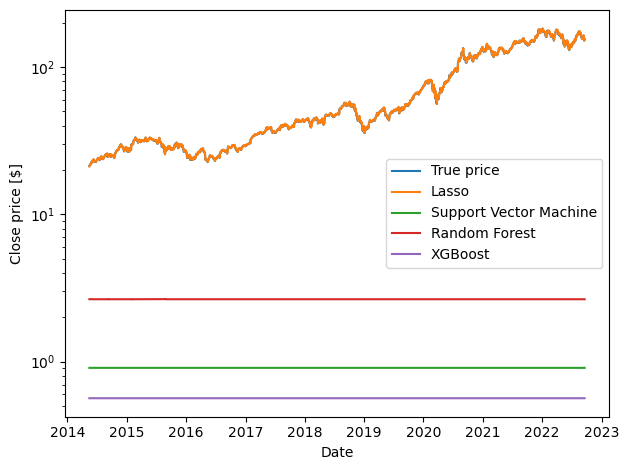

In [46]:
y_test_pred_lasso=pd.Series(y_test_pred_lasso, index =y_test.index)
y_test_pred_svr=pd.Series(y_test_pred_svr, index =y_test.index)
y_test_pred_rf=pd.Series(y_test_pred_rf, index =y_test.index)
y_test_pred_XGB=pd.Series(y_test_pred_XGB, index =y_test.index)


plt.plot(y_test,label='True price') 
plt.plot(y_test_pred_lasso,label='Lasso') 
plt.plot(y_test_pred_svr,label='Support Vector Machine') 
plt.plot(y_test_pred_rf,label='Random Forest') 
plt.plot(y_test_pred_XGB,label='XGBoost') 
plt.xlabel('Date') #fontsize = 12
plt.ylabel('Close price [$]') #fontsize = 12
# plt.xticks(fontsize=12) # Slide purpose
# plt.yticks(fontsize=12) # Slide purpose
plt.semilogy() 
plt.legend()
plt.tight_layout()
# plt.savefig('../figures/close_trend_all.png',dpi=300)
plt.show()

**Global Feature Importance**

Coefficients of the linear model

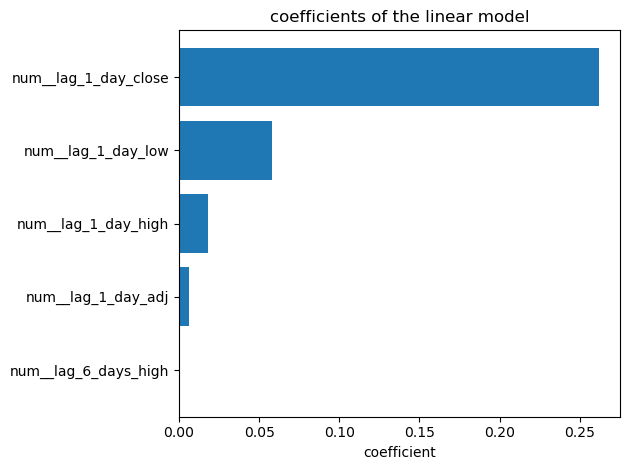

In [47]:
coefs = final_models_lasso[-1].coef_
sorted_indcs = np.argsort(np.abs(coefs))

# plt.figure(figsize=(6.4,4.8))
# plt.rcParams.update({'font.size': 13})
plt.barh(np.arange(5),coefs[sorted_indcs[-5:]])
plt.yticks(np.arange(5),feature_names[sorted_indcs[-5:]])
plt.xlabel('coefficient')
plt.title('coefficients of the linear model')
plt.tight_layout()
# plt.savefig('figures/LR_coefs_scaled.png',dpi=300)
plt.show()

XGBoost's feature importance metrics

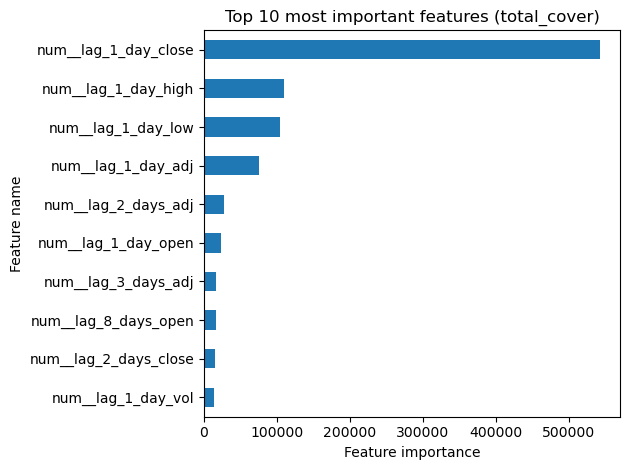

In [48]:
total_cover = XGB.get_booster().get_score(importance_type="total_cover")
    
total_cover_df = pd.DataFrame(
    [key, total_cover[key]] for key in sorted(total_cover, key=total_cover.get, reverse=True)[:10]
)

# total_cover_df

fig, ax = plt.subplots()
total_cover_df[1][-1::-1].plot.barh(ax=ax)
ax.set_title("Top 10 most important features (total_cover)")
ax.set_yticklabels(total_cover_df[0][-1::-1])
ax.set_ylabel("Feature name")
ax.set_xlabel("Feature importance")
fig.tight_layout()

SHAP values for global feature importance

(3049, 60)
(3049, 60)


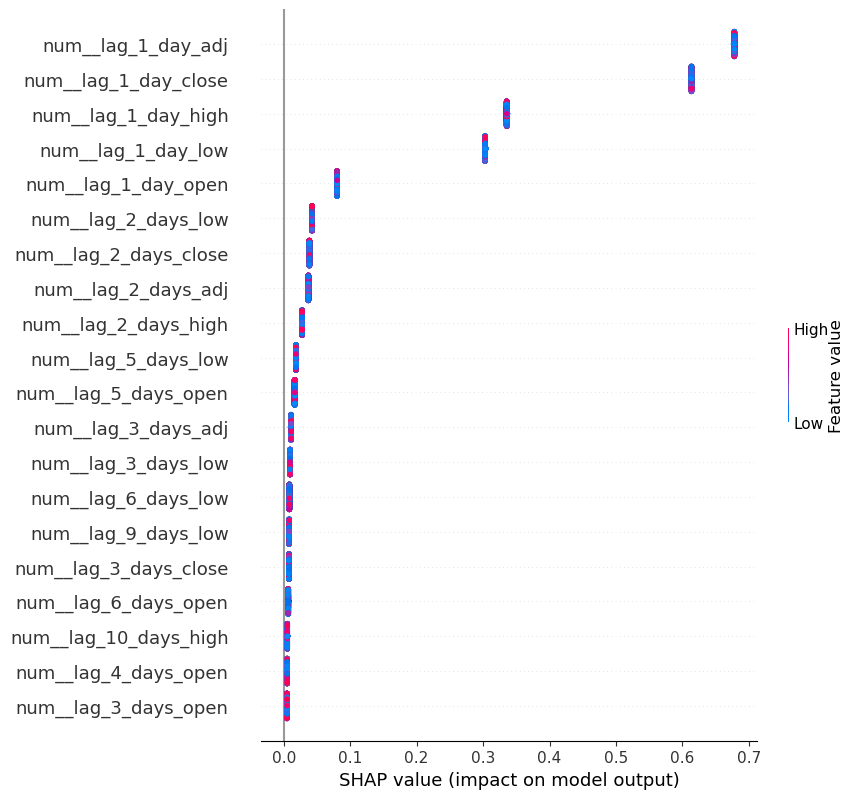

In [59]:
import shap
shap.initjs() # required for visualizations later on
# create the explainer object with the random forest model
explainer = shap.TreeExplainer(final_models_rf[np.argmin(test_scores)])
# calculate shap values on the test set
shap_values = explainer.shap_values(df_test.iloc[:])
print(np.shape(shap_values))

shap.summary_plot(shap_values, df_test.iloc[:],feature_names = feature_names)

Least Important Features

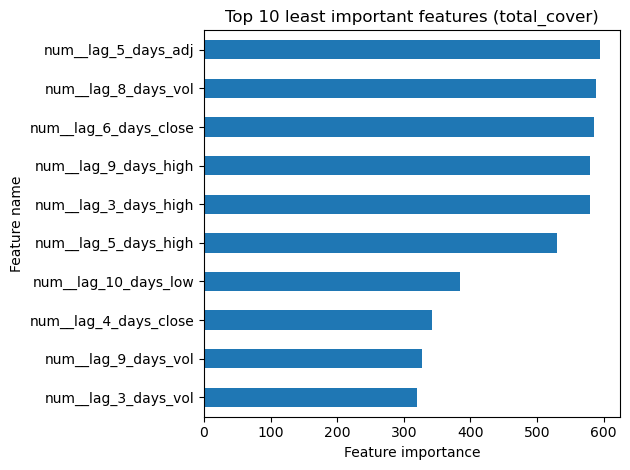

In [60]:
total_cover = XGB.get_booster().get_score(importance_type="total_cover")
    
total_cover_df = pd.DataFrame(
    [key, total_cover[key]] for key in sorted(total_cover, key=total_cover.get, reverse=True)[-10:]
)

# total_cover_df

fig, ax = plt.subplots()
total_cover_df[1][-1::-1].plot.barh(ax=ax)
ax.set_title("Top 10 least important features (total_cover)")
ax.set_yticklabels(total_cover_df[0][-1::-1])
ax.set_ylabel("Feature name")
ax.set_xlabel("Feature importance")
fig.tight_layout()

**Local Feature Importance**

In [65]:
index = 1124 # the index of the point to explain
shap.force_plot(explainer.expected_value, shap_values[index], features = df_test.iloc[index],feature_names = feature_names)

In [66]:
index = 2124 # the index of the point to explain
shap.force_plot(explainer.expected_value, shap_values[index], features = df_test.iloc[index],feature_names = feature_names)